In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv file
df=pd.read_csv("G:\project\Google-Playstore.csv")
df.head(n=5)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

(1118136, 23)

In [5]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [6]:
#Dropping unnecessary columns
df=df.drop(columns=['App Id','Currency','Developer Id','Developer Website','Minimum Android','Developer Email','Privacy Policy','Ad Supported','Editors Choice'])

In [7]:
#Checking unique categories
df['Category'].unique()

array(['Communication', 'Strategy', 'Tools', 'Business', 'Music & Audio',
       'Maps & Navigation', 'Lifestyle', 'Educational', 'Productivity',
       'News & Magazines', 'Food & Drink', 'Photography',
       'Books & Reference', 'Shopping', 'Board', 'Sports', 'Medical',
       'Health & Fitness', 'House & Home', 'Education', 'Auto & Vehicles',
       'Finance', 'Parenting', 'Travel & Local', 'Personalization',
       'Entertainment', 'Video Players & Editors', 'Puzzle', 'Casual',
       'Events', 'Arcade', 'Music', 'Trivia', 'Action', 'Simulation',
       'Racing', 'Weather', 'Role Playing', 'Adventure', 'Social', 'Word',
       'Comics', 'Art & Design', 'Card', 'Libraries & Demo', 'Casino',
       'Beauty', 'Dating', nan], dtype=object)

In [8]:
#Checking Duplicate Values in App Name
duplicate=df[df.duplicated('App Name')]
duplicate.count()
#duplicate

App Name            71266
Category            71266
Rating              71066
Rating Count        71066
Installs            71264
Minimum Installs    71264
Maximum Installs    71266
Free                71266
Price               71266
Size                71266
Released            70992
Last Updated        71266
Content Rating      71266
In App Purchases    71266
dtype: int64

In [9]:
#Displaying Duplicate Values
duplicate.head(n=5)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Size,Released,Last Updated,Content Rating,In App Purchases
392,Timer,Tools,4.1,27.0,"1,000+",1000.0,3835,True,0.0,2.6M,"Sep 27, 2019","Sep 26, 2020",Everyone,True
976,Music Player,Music & Audio,4.7,49065.0,"1,000,000+",1000000.0,3719371,True,0.0,7.4M,"Nov 15, 2019","Sep 25, 2020",Everyone,True
2052,Caapora Adventure - Ojibe's Revenge,Role Playing,4.6,64.0,"5,000+",5000.0,7465,True,0.0,96M,"Nov 18, 2018","Aug 27, 2020",Everyone 10+,True
2623,Automatic Background Changer,Photography,4.5,146217.0,"10,000,000+",10000000.0,15099618,True,0.0,5.4M,"Oct 6, 2018","May 05, 2019",Everyone,False
2847,Solitaire,Card,4.6,127302.0,"10,000,000+",10000000.0,14563059,True,0.0,5.6M,"Jan 18, 2017","Oct 14, 2019",Everyone,False


In [10]:
#Drooping the Duplicated Values
df=df.drop_duplicates('App Name', inplace=False)

In [11]:
#Again Checking Duplicate Values
duplicate=df[df.duplicated('App Name')]
duplicate.count()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
In App Purchases    0
dtype: int64

In [12]:
# Converting Released column to Date type
df['Released'] = pd.to_datetime(df['Released'])

In [13]:
# Converting Released column to Date type
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [14]:
#Dropping the rows where release date is below 2018
df.drop(df[(df['Released'] <= '01-01-2018')].index,inplace=True)

In [15]:
df.shape

(671347, 14)

In [16]:
#Cleaning Installs Column(remove , and + and convert the data type from object to float)
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype('float')

In [17]:
#CLeaning Of Size column
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))
df.sort_values('Size',ascending=False).head()
#Converting Size column to numerics
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [18]:
#Checking Null Values 
df.isnull().sum()

App Name                0
Category                1
Rating               6637
Rating Count         6637
Installs              159
Minimum Installs      159
Maximum Installs        0
Free                    0
Price                   0
Size                19619
Released             7456
Last Updated            0
Content Rating          0
In App Purchases        0
dtype: int64

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

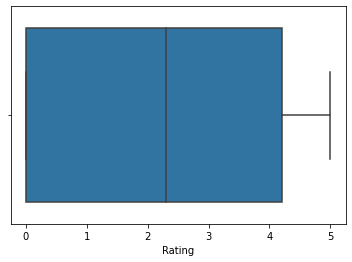

In [19]:
#Show the shape of the distribution, its central value, and its variability.
sns.boxplot(df.Rating)

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

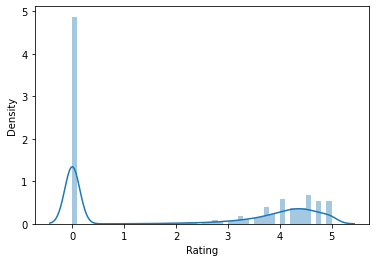

In [20]:
#Show displot to show univariate distribution of data
sns.distplot(df.Rating)

In [21]:
df_mean=df['Rating'].mean()
df_median=df['Rating'].median()
print("Mean of Rating: ",df_mean)
print("Median of Rating: ",df_median)

Mean of Rating:  2.103992116862932
Median of Rating:  2.3


In [22]:
#Replace null values in Rating column and Rating Count column with mean values category wise
#As mean values is same and data is distributed normally,no outliers hence replacing with mean 
df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean').round(2))
df['Rating Count'] = df['Rating Count'].fillna(df.groupby('Category')['Rating Count'].transform('mean').round(2))

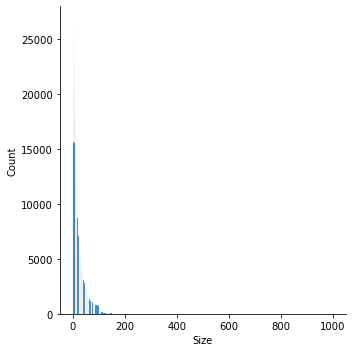

In [23]:
#Show distplot of Size Column
sns.displot(df.Size)

In [24]:
df_mean_size = df["Size"].mean()
df_median_size = df["Size"].median()
print("Mean of Size: ", df_mean_size)
print("Median of Size: ",df_median_size)

Mean of Size:  21.79213076620935
Median of Size:  10.0


In [25]:
#Replace null values in size column with median category wise 
#As mean values is greater than median and data is +vely skewed hence replacing with median 
df['Size'] = df['Size'].fillna(df.groupby('Category')['Size'].transform('median').round(2))

In [26]:
#Dropping remaining rows with null values
df.dropna(inplace=True)

In [27]:
#Reseting the index in the dataframe
df.reset_index(drop=True,inplace=True)

In [28]:
df.isnull().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
In App Purchases    0
dtype: int64

In [29]:
df.shape

(663890, 14)

In [30]:
#Extracting new feature Days from Released Date and Updated Date
Days=df['Last Updated']-df['Released']
print(Days)

0        861 days
1        641 days
2        628 days
3        775 days
4        155 days
           ...   
663885   107 days
663886   326 days
663887   106 days
663888   353 days
663889   945 days
Length: 663890, dtype: timedelta64[ns]


In [31]:
df['Days']=Days

In [32]:
df['Days'].astype('timedelta64[D]')

0         861.0
1         641.0
2         628.0
3         775.0
4         155.0
          ...  
663885    107.0
663886    326.0
663887    106.0
663888    353.0
663889    945.0
Name: Days, Length: 663890, dtype: float64

In [33]:
df['Days']=df['Days'].apply(lambda x: str(x).replace('days',''))
df['Days']=df['Days'].apply(lambda x: str(x).replace('00:00:00',''))
df['Days']=df['Days'].apply(lambda x: str(x).replace('-',''))
df['Days']=df['Days'].apply(lambda x: str(x).replace('+',''))

In [34]:
df['Days'].astype('int')

0         861
1         641
2         628
3         775
4         155
         ... 
663885    107
663886    326
663887    106
663888    353
663889    945
Name: Days, Length: 663890, dtype: int32

In [35]:
df.to_csv("Google-PlayStore.csv")

<AxesSubplot:>

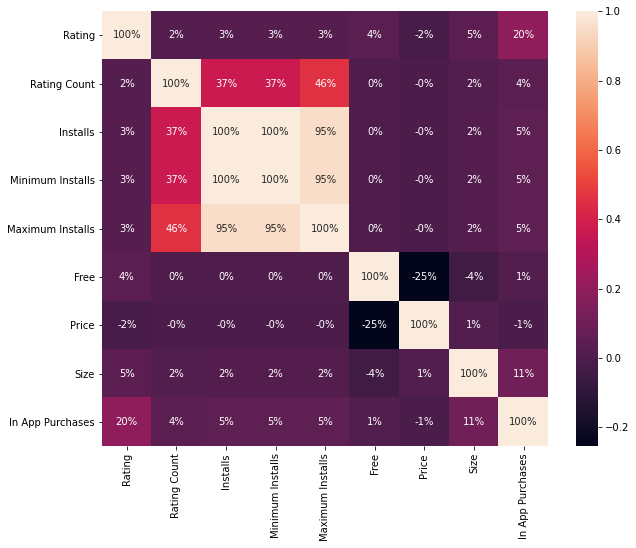

In [36]:
#Visualize the Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

[Text(0.5, 0, 'Number of Apps'),
 Text(0.5, 1.0, 'Number of Apps According to Category')]

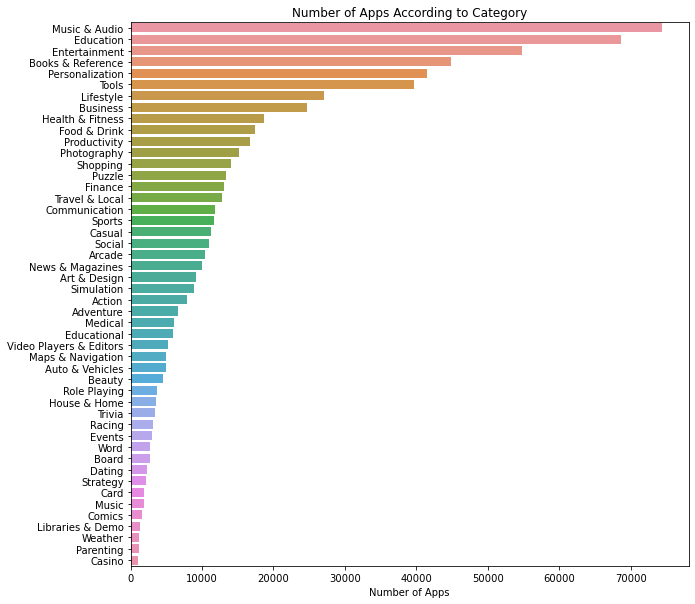

In [37]:
#Number of Apps According to Category
fig = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x = df['Category'].value_counts().values, 
                 y = df['Category'].value_counts().index)
ax.set(xlabel = 'Number of Apps', title = 'Number of Apps According to Category')

Text(0.5, 1.0, 'Installs Acoording to Category')

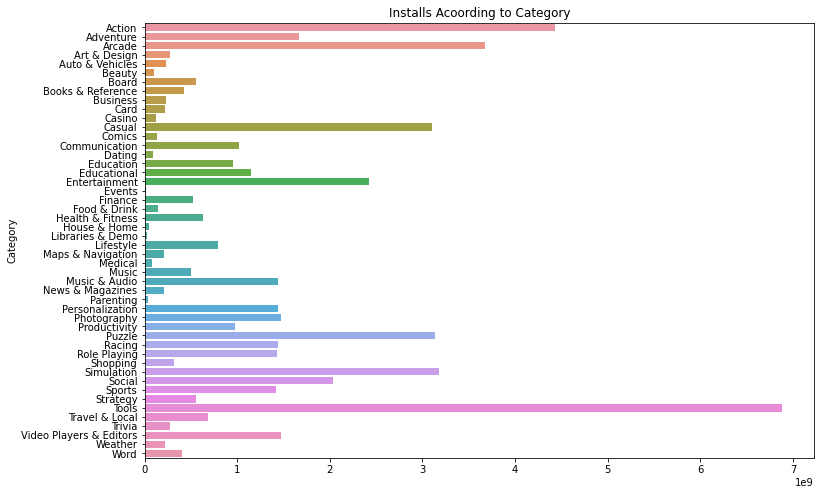

In [38]:
#Most Installed Category 
plt.figure(figsize=(12,8))
fig=sns.barplot(x = df.groupby('Category')['Installs'].sum().values,
            y = df.groupby('Category')['Installs'].sum().index, 
            data=df)
plt.title("Installs Acoording to Category")

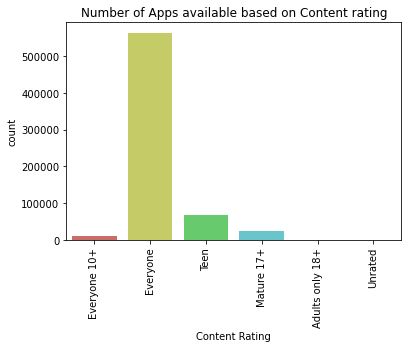

In [39]:
#Visualization of Content Rating
fig = sns.countplot(x=df['Content Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title("Number of Apps available based on Content rating")
plt.show(fig)

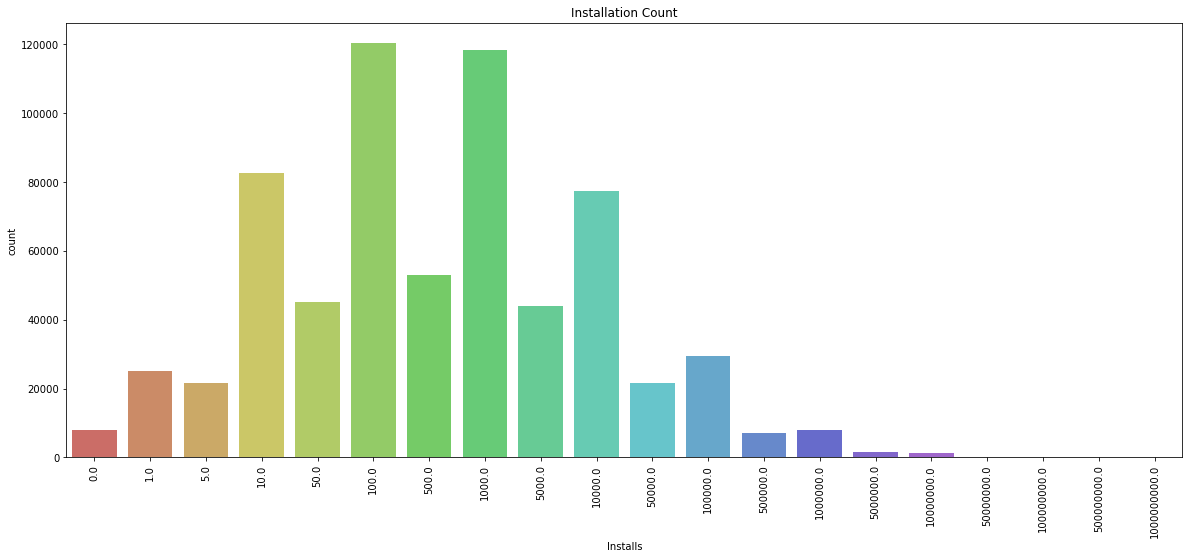

In [40]:
#Installation Count
#Count Installation
plt.figure(figsize=(20,8))
fig = sns.countplot(x=df['Installs'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.title("Installation Count")
plt.show(fig)

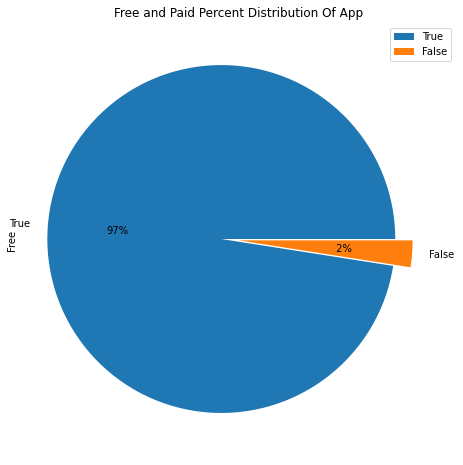

In [41]:
#Pie Chart of Free and Paid App 
plt.figure(figsize=(8,8))
explode=[0.1,0]
df['Free'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend()
plt.title("Free and Paid Percent Distribution Of App")
plt.show()

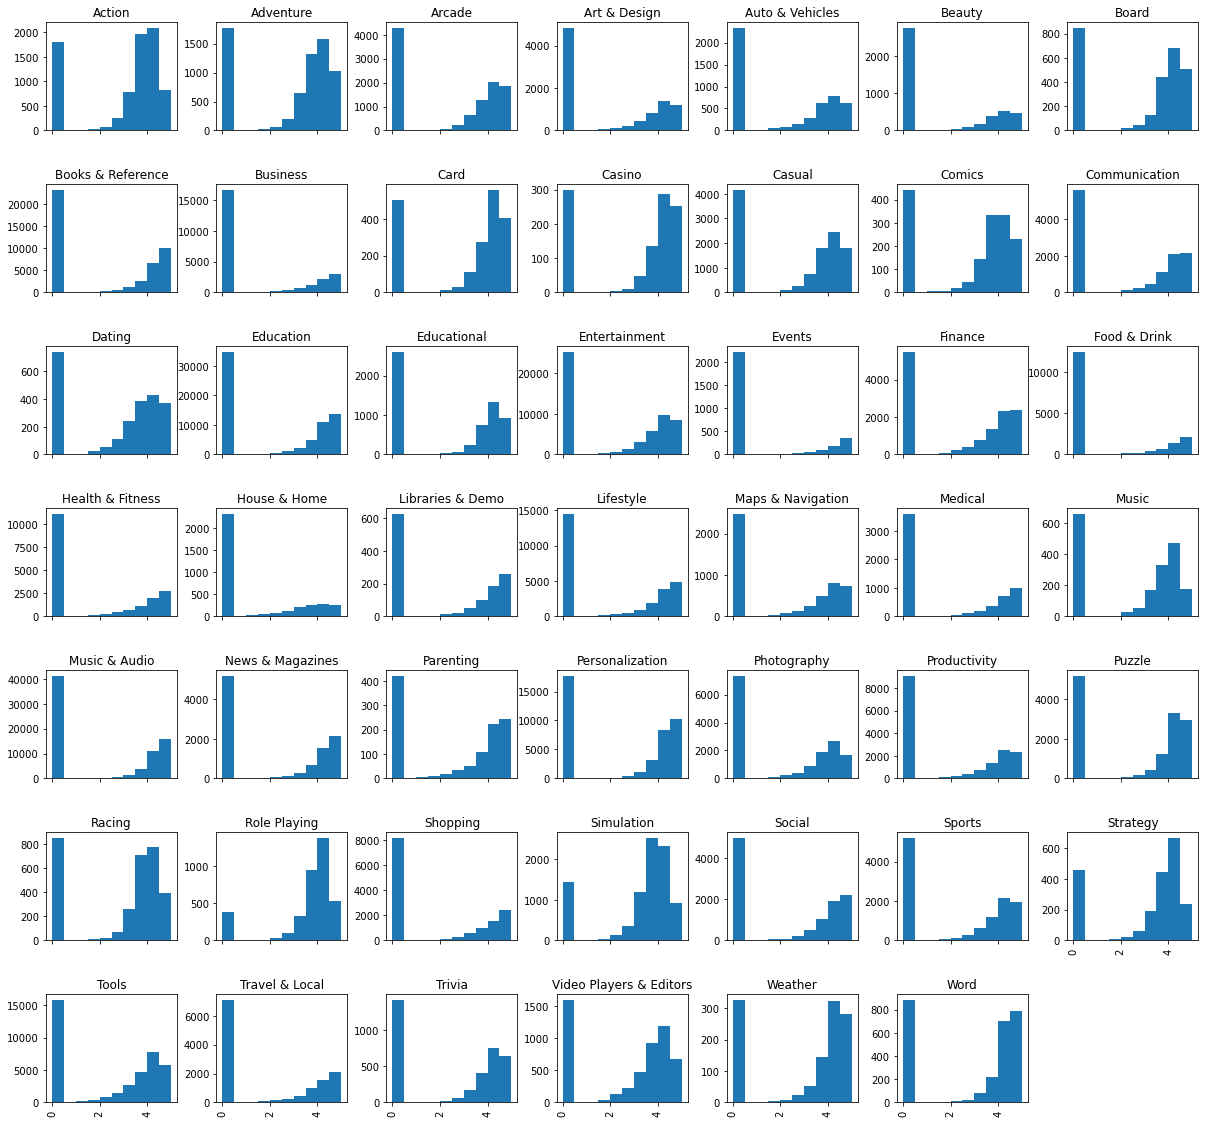

In [42]:
#Average Rating by Category
groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
categoryrating = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

In [43]:

import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier
%matplotlib inline

In [44]:
#Get Dummies for Category, Free, Content Rating columns
catgry=pd.get_dummies(df['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(df['Free'],prefix='typ',drop_first=True)
cr=pd.get_dummies(df['Content Rating'],prefix='cr',drop_first=True)
frames=[df,catgry,typ,cr]
df=pd.concat(frames,axis=1)
df.drop(['Category','Free','Content Rating'],axis=1,inplace=True)

In [45]:
#Dropping Unncessary columns
df.drop(['App Name','Price','Minimum Installs','Maximum Installs','Last Updated','Released','In App Purchases'],axis=1,inplace=True)

In [46]:
df.head(n=3)

,Rating,Rating Count,Installs,Size,Days,catg_Adventure,catg_Arcade,catg_Art & Design,catg_Auto & Vehicles,catg_Beauty,...,catg_Trivia,catg_Video Players & Editors,catg_Weather,catg_Word,typ_True,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.3,17297.0,1000000.0,86.0,861,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,3.5,377.0,10000.0,12.0,641,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,4.4,3346.0,100000.0,9.4,628,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [47]:
X=df.drop('Rating',axis=1)
y=df['Rating'].values
y=y.astype('int')

In [48]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [49]:
#Applying Model Logistic Regression
logreg_c=LogisticRegression(random_state=2020)
logreg_c.fit(X_train,y_train)
logreg_pred=logreg_c.predict(X_test)
logreg_cm=confusion_matrix(y_test,logreg_pred)
logreg_ac=accuracy_score(y_test, logreg_pred)
print('LogisticRegression_accuracy:',logreg_ac)

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression_accuracy: 0.5021690340267213


In [50]:
#Applying Model DecisionTree Classifier
dtree_c=DecisionTreeClassifier(random_state=2020)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)
print('DecisionTreeClassifier_Accuracy: ',dtree_ac)

DecisionTreeClassifier_Accuracy:  0.7488364036210818


In [51]:
#Applying Model RandomForest
rdf_c=RandomForestClassifier(random_state=2020)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
print('RandomForest_Accuracy: ', rdf_ac)

RandomForest_Accuracy:  0.7911702239828887


In [52]:
#Applying Model Naive Bayesian
NB = BernoulliNB(binarize = 0.0)
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
nb_ac=accuracy_score(y_test, y_pred)
print("Bernoulli Naive Bayes_Accuracy: ", nb_ac)

Bernoulli Naive Bayes_Accuracy:  0.7940848634562955


In [53]:
#Applying Model CatBoost Model
Cat_Boost = CatBoostClassifier(verbose = 0, n_estimators = 100)
Cat_Boost.fit(X_train, y_train)
cb_ac=Cat_Boost.score(X_train, y_train)
print("CatBoost_Accuracy: ",cb_ac)

CatBoost_Accuracy:  0.8121488499600837


Text(0.5, 1.0, 'Model Accracy Comparison')

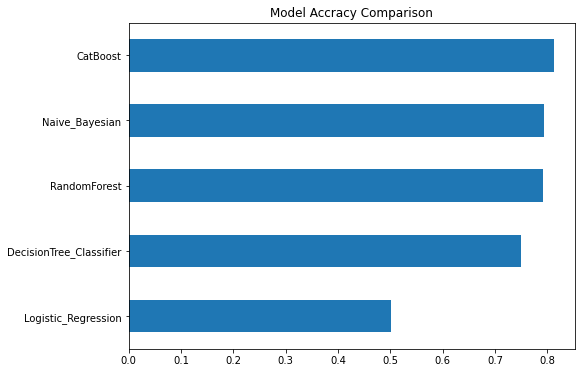

In [54]:
model_accuracy = pd.Series(data=[logreg_ac,dtree_ac,rdf_ac,nb_ac,cb_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','RandomForest','Naive_Bayesian','CatBoost'])
fig= plt.figure(figsize=(8,6))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy Comparison')